### YASHASVI VERMA

IMPORTING LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
X = np.arange(0.0, 5.0, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

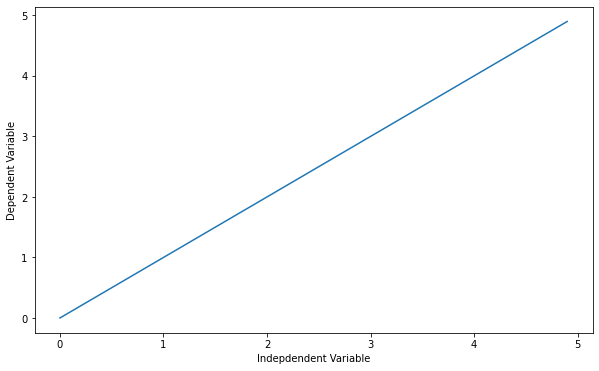

In [8]:
a = 1
b = 0

Y= a * X + b 

plt.plot(X, Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [26]:

import pandas as pd

In [30]:
fuelcsv = pd.read_csv(r"C:\\Users\\rituv\\Desktop\\Machine Learning\\fuel.csv")
print(fuelcsv)

   Model   Make            Model.1 Vehicle Class  Engine Size  Unnamed: 5
0   2020  Acura                ILX       Compact          2.4           4
1   2020  Acura         MDX SH-AWD    SUV: Small          3.5           6
2   2020  Acura  MDX SH-AWD A-SPEC    SUV: Small          3.5           6
3   2020  Acura     MDX Hybrid AWD    SUV: Small          3.0           6
4   2020  Acura            RDX AWD    SUV: Small          2.0           4
5   2020  Acura     RDX AWD A-SPEC    SUV: Small          2.0           4
6   2020  Acura         RLX Hybrid      Mid-size          3.5           6
7   2020  Acura         TLX A-SPEC       Compact          2.4           4


In [34]:
train_x = np.asanyarray(fuelcsv[['Engine Size']])
train_y = np.asanyarray(fuelcsv[['Model']])

In [35]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)


def h(x):
   y = a*x + b
   return y

In [36]:
def loss_object(y,train_y) :
    return tf.reduce_mean(tf.square(y - train_y))

In [37]:
learning_rate = 0.01
train_data = []
loss_values =[]
training_epochs = 200

for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted = h(train_x)
        loss_value = loss_object(train_y,y_predicted)
        loss_values.append(loss_value)

        gradients = tape.gradient(loss_value, [b,a])
   
        b.assign_sub(gradients[0]*learning_rate)
        a.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])

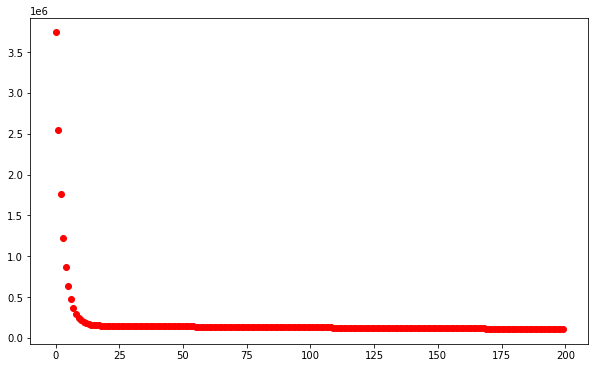

In [38]:
plt.plot(loss_values, 'ro')

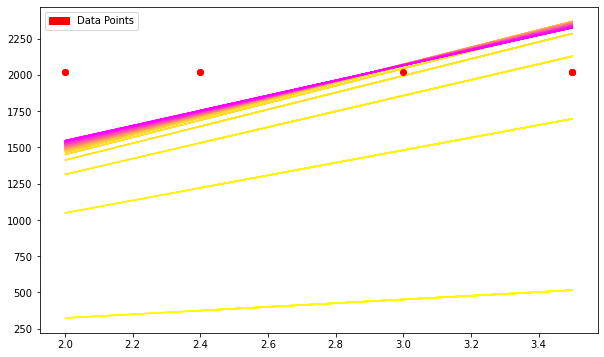

In [40]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')
green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()